In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

In [11]:
def ridgeplot(df, overlap, fill, cmap, xlabel, size_factor, n_points):
    rc = {"font.family" : "serif", "mathtext.fontset" : "stix"}
    plt.rcParams.update(rc)
    plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
    
    # generate figure
    fig = plt.figure()
    
    # get numpy values
    data = df.values
    
    # get xmin & xmax
    xmin = data.flatten().min()
    xmax = data.flatten().max()
    
    # get absolute max
    absmax = max(abs(xmin), abs(xmax))
    
    # generate x axis
    x = np.linspace(-absmax, absmax, n_points)
    
    # colors
    colors = cm.get_cmap(cmap)(np.linspace(0.5, 0.9, len(data)))
    
    ax = fig.add_subplot(1, 1, 1)
    
    yticks = []
    for i, row in enumerate(data):
        # set a point on y axis
        y = i * (1. - overlap)
        yticks.append(y)
        
        # gaussian distribution
        pdf = gaussian_kde(row)
        curve = pdf(x)
        
        # zorder
        zorder = len(data) - i + 1
        
        ax.plot(x, curve + y, c='w', linewidth=0.5, zorder=zorder)
        
        if fill:
            ax.fill_between(x, np.ones(n_points) * y, curve + y, zorder=zorder, color=colors[i], alpha=0.5)
        
        # set ylabel
        if i == 0:
            ax.set_ylabel('Epoch', fontsize=14, labelpad=8)
    
    # plot grid
    ax.grid(axis='y')
    
    # hide top, left, right spines
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # save max yticks
    ytickmax = max(yticks)
    
    # pick yticks & generate ticklabels
    yticks = np.array(yticks)[4::5]
    yticklabels = np.arange(1, len(yticks) + 1) * 5
    
    # set yticks & labels
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    
    ax.tick_params(labelsize=12)
    
    # set xlabel
    ax.set_xlabel(xlabel, fontsize=16, labelpad=4)
    
    fig.set_size_inches(4., (ytickmax + curve.max()) * size_factor)

# Load Data

In [5]:
df = pd.read_csv('inputs/cse/input4.csv', header=None)

In [7]:
# row: epoch
# col: input to activation function
df.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-10.5970,-8.22259,-7.86184,-6.79235,-12.8679,1.87978,-7.22984,-16.1344,-3.77031,-9.89678,...,-12.3198,-10.4929,4.17329,-7.97053,-5.65736,-10.7894,-5.01776,-4.41350,-8.16009,-6.39178
1,-13.1173,-9.46937,-9.47116,-9.65362,-15.1362,3.48915,-6.77651,-18.9496,-3.73795,-11.05910,...,-14.1118,-12.3336,6.18123,-8.32197,-8.50686,-11.9946,-7.05070,-3.03056,-9.10130,-10.38240
2,-14.0369,-10.87110,-11.16300,-11.82090,-15.9320,3.93583,-6.91878,-19.5953,-3.04099,-11.74420,...,-14.7276,-13.3177,6.83870,-9.16495,-9.56479,-12.5340,-7.56502,-3.26159,-9.40175,-12.67600
3,-15.0890,-11.70060,-12.91620,-12.37020,-16.3366,3.95617,-7.96807,-20.5042,-3.06594,-12.26860,...,-15.4167,-13.8967,6.86976,-9.39251,-10.67040,-12.6827,-8.56302,-3.27661,-9.33957,-14.44580
4,-16.3933,-13.62390,-14.50470,-13.18650,-17.4668,3.43247,-9.22135,-22.1945,-2.77679,-13.26050,...,-15.8388,-14.1937,7.34179,-9.86320,-12.05910,-13.4828,-8.77584,-3.80913,-9.23714,-16.53730


# Plot

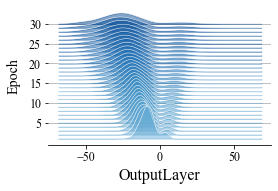

In [12]:
ridgeplot(df, 0.99, True, 'Blues', 'OutputLayer', 8, 150)